In [3]:
import pandas as pd

## zipcode data

In [17]:
uszips = pd.read_csv('../data_collection/uszips.csv', index_col=None)
uszips.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [22]:
uszips_simple = uszips[['zip', 'city', 'county_name']]
uszips_simple['zip'] = uszips_simple['zip'].astype(str).str.zfill(5)
uszips_simple.to_csv('../data_for_model/uszips_simple.csv', index=False)

/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
uszips_simple.head()

,zip,city,county_name
0,00601,Adjuntas,Adjuntas
1,00602,Aguada,Aguada
2,00603,Aguadilla,Aguadilla
3,00606,Maricao,Maricao
4,00610,Anasco,Añasco


## College data

In [7]:
college_df = pd.read_csv('../data_for_model/US_schools.csv', index_col=None)
college_df.head()

,UNITID,NAME,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LOCALE,...,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,1089,Madison County,12,...,"Huntsville, AL",1,290,"Huntsville-Decatur, AL",N,N,105,1019,1007,2021-2022
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,1073,Jefferson County,12,...,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,107,1055,1018,2021-2022
2,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,1101,Montgomery County,12,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1074,1025,2021-2022
3,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,1089,Madison County,12,...,"Huntsville, AL",1,290,"Huntsville-Decatur, AL",N,N,105,1006,1002,2021-2022
4,100724,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271,1,1101,Montgomery County,12,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,107,1077,1026,2021-2022


In [12]:
college_df["zip_cd"]= college_df["ZIP"].str.slice(0, 5, 1)

In [33]:
college_df_2 = college_df.groupby(['zip_cd']).size().reset_index()
college_df_2 = college_df_2.rename(columns={0: "college_cnt"})
print(college_df_2)

     zip_cd  college_cnt
0     00603            2
1     00604            1
2     00612            2
3     00614            3
4     00662            1
...     ...          ...
4655  99664            1
4656  99669            1
4657  99723            1
4658  99775            2
4659  99801            1

[4660 rows x 2 columns]


In [38]:
college_df_3 = uszips_simple.merge(college_df_2, how='left', left_on='zip', 
                                   right_on='zip_cd').drop(columns=['zip_cd'])
college_df_3['college_cnt'] = college_df_3['college_cnt'].fillna(0)
college_df_3

,zip,city,county_name,college_cnt
0,00601,Adjuntas,Adjuntas,0.0
1,00602,Aguada,Aguada,0.0
2,00603,Aguadilla,Aguadilla,2.0
3,00606,Maricao,Maricao,0.0
4,00610,Anasco,Añasco,0.0
...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,0.0
33784,99925,Klawock,Prince of Wales-Hyder,0.0
33785,99926,Metlakatla,Prince of Wales-Hyder,0.0
33786,99927,Point Baker,Prince of Wales-Hyder,0.0


## Walmart

In [34]:
walmart_df = pd.read_csv('../data_for_model/Walmart_Locations.csv', index_col=None)
walmart_df.head()

,Store_Name,Address,City_and_State,Zipcode,Phone_Number
0,Supercenter #1158,2473 Hackworth Rd,"Adamsville, AL",35214,205-798-9721
1,Supercenter #726,2643 Highway 280,"Alexander City, AL",35010,256-234-0316
2,Supercenter #1091,1991 M. L. King Jr.,"Andalusia, AL",36420,334-222-6561
3,Supercenter #329,5560 Mcclellan Blvd,"Anniston, AL",36206,256-820-3326
4,Supercenter #306,1450 No. Brindlee Mt,"Arab, AL",35016,256-586-8168


In [43]:
walmart_df_2 = walmart_df.groupby(['Zipcode']).size().reset_index()
walmart_df_2 = walmart_df_2.rename(columns={0: "walmart_cnt"})
walmart_df_2["Zipcode"]= walmart_df_2["Zipcode"].astype(str).str.zfill(5)
print(walmart_df_2)

     Zipcode  walmart_cnt
0      01020            1
1      01035            1
2      01060            1
3      01082            1
4      01085            1
...      ...          ...
4156   99611            1
4157   99615            1
4158   99654            1
4159   99701            1
4160   99901            1

[4161 rows x 2 columns]


In [44]:
walmart_df_3 = college_df_3.merge(walmart_df_2, how='left', left_on='zip', 
                                   right_on='Zipcode').drop(columns=['Zipcode'])
walmart_df_3['walmart_cnt'] = walmart_df_3['walmart_cnt'].fillna(0)
walmart_df_3

,zip,city,county_name,college_cnt,walmart_cnt
0,00601,Adjuntas,Adjuntas,0.0,0.0
1,00602,Aguada,Aguada,0.0,0.0
2,00603,Aguadilla,Aguadilla,2.0,0.0
3,00606,Maricao,Maricao,0.0,0.0
4,00610,Anasco,Añasco,0.0,0.0
...,...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,0.0,0.0
33784,99925,Klawock,Prince of Wales-Hyder,0.0,0.0
33785,99926,Metlakatla,Prince of Wales-Hyder,0.0,0.0
33786,99927,Point Baker,Prince of Wales-Hyder,0.0,0.0


## High school data

In [72]:
SanDiego_school = pd.read_csv('../data_for_model/SanDiego_school.csv', index_col=None, header=[4])
Boston_schools = pd.read_csv('../data_for_model/Boston_schools.csv', index_col=None, header=[4])
LosAngeles_schools = pd.read_csv('../data_for_model/LosAngeles_schools.csv', index_col=None, header=[4])
NewYork_schools = pd.read_csv('../data_for_model/NewYork_schools.csv', index_col=None, header=[4])
SanFan_schools = pd.read_csv('../data_for_model/SanFansisco_and_Bayarea_schools.csv', index_col=None, header=[4])


In [74]:
highSchool_df = pd.concat([SanDiego_school, Boston_schools, 
                             LosAngeles_schools, NewYork_schools, SanFan_schools], axis=0)
highSchool_df.head()

,NCES District ID,State District ID,District Name,County Name,Street Address,City,State,ZIP,ZIP 4-digit,Phone,Students,Teachers,Schools,Locale Code,Locale,Student Teacher Ratio,Type
0,602409.0,CA-6120935,Albert Einstein Academy Charter Elementary Dis...,San Diego County,3035 Ash St.,San Diego,CALIFORNIA,92102,1718,(619)795-1190,810.0,0.0,1.0,11,11-City: Large,NaN,7-Independent Charter District
1,601896.0,CA-0111898,Albert Einstein Academy Charter Middle District,San Diego County,458 26th St.,San Diego,CALIFORNIA,92102,1718,(619)795-1190,600.0,NaN,1.0,11,11-City: Large,-1.0,7-Independent Charter District
2,602100.0,CA-3767967,Alpine Union Elementary,San Diego County,2001 Tavern Rd,Alpine,CALIFORNIA,91901,2104,(619)445-3236,1635.0,0.0,5.0,21,21-Suburb: Large,NaN,1-Regular local school district that is NOT a ...
3,601468.0,CA-0136663,America's Finest Charter District,San Diego County,730 45th St.,San Diego,CALIFORNIA,92102,3619,(619)694-4809,467.0,0.0,1.0,11,11-City: Large,NaN,7-Independent Charter District
4,601645.0,CA-6116859,Arroyo Vista Charter District,San Diego County,2491 Sch House Rd.,Chula Vista,CALIFORNIA,91915,2534,(619)656-9676,936.0,0.0,1.0,11,11-City: Large,NaN,7-Independent Charter District


In [78]:
highSchool_df_2 = highSchool_df.groupby(['ZIP'])['Students'].sum().reset_index()
highSchool_df_2 = highSchool_df_2.rename(columns={'Students': "highSchool_student_cnt"})
highSchool_df_2["ZIP"]= highSchool_df_2["ZIP"].astype(str).str.zfill(5)
print(highSchool_df_2)

        ZIP  highSchool_student_cnt
0     01420                  5338.0
1     01432                  1682.0
2     01434                   397.0
3     01451                  1048.0
4     01453                  6078.0
...     ...                     ...
1297  95838                  6453.0
1298  95843                  4258.0
1299  95864                   568.0
1300  96120                    70.0
1301  96150                  3905.0

[1302 rows x 2 columns]


In [94]:
highSchool_df_3 = walmart_df_3.merge(highSchool_df_2, how='left', left_on='zip', 
                                   right_on='ZIP').drop(columns=['ZIP'])
highSchool_df_3

,zip,city,county_name,college_cnt,walmart_cnt,highSchool_student_cnt
0,00601,Adjuntas,Adjuntas,0.0,0.0,NaN
1,00602,Aguada,Aguada,0.0,0.0,NaN
2,00603,Aguadilla,Aguadilla,2.0,0.0,NaN
3,00606,Maricao,Maricao,0.0,0.0,NaN
4,00610,Anasco,Añasco,0.0,0.0,NaN
...,...,...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,0.0,0.0,NaN
33784,99925,Klawock,Prince of Wales-Hyder,0.0,0.0,NaN
33785,99926,Metlakatla,Prince of Wales-Hyder,0.0,0.0,NaN
33786,99927,Point Baker,Prince of Wales-Hyder,0.0,0.0,NaN


In [95]:
highSchool_df_3[highSchool_df_3['city'].isin(['Los Angeles', 'San Francisco',
                                              'Boston', 'San Diego', 'New York'])]

,zip,city,county_name,college_cnt,walmart_cnt,highSchool_student_cnt
469,02108,Boston,Suffolk,1.0,0.0,NaN
470,02109,Boston,Suffolk,0.0,0.0,NaN
471,02110,Boston,Suffolk,0.0,0.0,NaN
472,02111,Boston,Suffolk,0.0,0.0,NaN
473,02113,Boston,Suffolk,0.0,0.0,NaN
...,...,...,...,...,...,...
31620,94132,San Francisco,San Francisco,1.0,0.0,NaN
31621,94133,San Francisco,San Francisco,1.0,0.0,NaN
31622,94134,San Francisco,San Francisco,0.0,0.0,NaN
31623,94158,San Francisco,San Francisco,0.0,0.0,NaN


In [96]:
highSchool_df_3['highSchool_student_cnt'] = highSchool_df_3[highSchool_df_3['city'].isin(['Los Angeles', 'San Francisco',
                                              'Boston', 'San Diego', 'New York'])]['highSchool_student_cnt'].fillna(0)

highSchool_df_3

,zip,city,county_name,college_cnt,walmart_cnt,highSchool_student_cnt
0,00601,Adjuntas,Adjuntas,0.0,0.0,NaN
1,00602,Aguada,Aguada,0.0,0.0,NaN
2,00603,Aguadilla,Aguadilla,2.0,0.0,NaN
3,00606,Maricao,Maricao,0.0,0.0,NaN
4,00610,Anasco,Añasco,0.0,0.0,NaN
...,...,...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,0.0,0.0,NaN
33784,99925,Klawock,Prince of Wales-Hyder,0.0,0.0,NaN
33785,99926,Metlakatla,Prince of Wales-Hyder,0.0,0.0,NaN
33786,99927,Point Baker,Prince of Wales-Hyder,0.0,0.0,NaN


In [98]:
highSchool_df_3.to_csv('../data_for_model/zipcode_attr.csv', index=False)

## Add Labels - has_store

In [103]:
mf = pd.read_csv('../data_collection/Meetfresh_stores.csv', index_col=None)
mf["zipcode"]= mf["zipcode"].astype(str).str.zfill(5)

mf.head()

,store_location,address,zipcode,state
0,CHANDLER,"1900 W Chandler Blvd, Ste 23&24, Chandler,AZ 8...",85224,AZ
1,MESA,"1832 W Broadway Road #100, Mesa,AZ 85202",85202,AZ
2,ANAHEIM,"400 Disney Way, Anaheim, CA 92802",92802,CA
3,ARCADIA,"400 S. Baldwin Ave, Ste 2275, Arcadia, CA 91007",91007,CA
4,CERRITOS,"11900 South St, Ste 109, Cerritos, CA 90703",90703,CA


In [100]:
zipcode_attr = highSchool_df_3

In [104]:
mf['has_store'] = 1

In [105]:
zipcode_attr_2 = zipcode_attr.merge(mf, how='left', left_on='zip', 
                                   right_on='zipcode').drop(columns=['store_location',
                                                                     "address", "state", "zipcode"])
zipcode_attr_2

,zip,city,county_name,college_cnt,walmart_cnt,highSchool_student_cnt,has_store
0,00601,Adjuntas,Adjuntas,0.0,0.0,NaN,NaN
1,00602,Aguada,Aguada,0.0,0.0,NaN,NaN
2,00603,Aguadilla,Aguadilla,2.0,0.0,NaN,NaN
3,00606,Maricao,Maricao,0.0,0.0,NaN,NaN
4,00610,Anasco,Añasco,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,0.0,0.0,NaN,NaN
33784,99925,Klawock,Prince of Wales-Hyder,0.0,0.0,NaN,NaN
33785,99926,Metlakatla,Prince of Wales-Hyder,0.0,0.0,NaN,NaN
33786,99927,Point Baker,Prince of Wales-Hyder,0.0,0.0,NaN,NaN


In [108]:
has_store_city = list(zipcode_attr_2[zipcode_attr_2['has_store']==1]['city'])

In [109]:
zipcode_attr_2['has_store'] = zipcode_attr_2[zipcode_attr_2['city'].isin(has_store_city)]['has_store'].fillna(0)

In [111]:
zipcode_attr_2[zipcode_attr_2['city'].isin(has_store_city)]

,zip,city,county_name,college_cnt,walmart_cnt,highSchool_student_cnt,has_store
293,01473,Westminster,Worcester,0.0,0.0,NaN,0.0
492,02134,Allston,Suffolk,0.0,0.0,NaN,1.0
1078,04101,Portland,Cumberland,1.0,0.0,NaN,0.0
1079,04102,Portland,Cumberland,1.0,0.0,NaN,0.0
1080,04103,Portland,Cumberland,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
33029,98195,Seattle,King,3.0,0.0,NaN,0.0
33030,98198,Seattle,King,1.0,0.0,NaN,0.0
33031,98199,Seattle,King,0.0,0.0,NaN,0.0
33521,99343,Mesa,Franklin,0.0,0.0,NaN,0.0


In [113]:
zipcode_attr_2.to_csv('../data_for_model/zipcode_attr_label.csv', index=False)

# Test

In [119]:
train_val_df = zipcode_attr_2[zipcode_attr_2['has_store'].notna()]

In [120]:
train_val_np = train_val_df.to_numpy()

x = train_val_np[:, :-1]

y = train_val_np[:, -1]

print(x, y)

[['01473' 'Westminster' 'Worcester' 0.0 0.0 nan]
 ['02134' 'Allston' 'Suffolk' 0.0 0.0 nan]
 ['04101' 'Portland' 'Cumberland' 1.0 0.0 nan]
 ...
 ['98199' 'Seattle' 'King' 0.0 0.0 nan]
 ['99343' 'Mesa' 'Franklin' 0.0 0.0 nan]
 ['99694' 'Houston' 'Matanuska-Susitna' 0.0 0.0 nan]] [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [121]:
y.shape

(732,)

## Data Merge 

In [135]:
mc_df = pd.read_csv('../data_for_model/num_Mc_Star.csv', index_col=None).drop(columns=['Unnamed: 0'])  
mc_df['zip'] = mc_df['zip'].astype(str).str.zfill(5)
mc_df

,zip,city,county_name,Num_Mcdonalds,Num_Starbucks,Num_Teavana
0,01001,Agawam,Hampden,1,0,0
1,01007,Belchertown,Hampshire,1,0,0
2,01008,Blandford,Hampden,2,0,0
3,01013,Chicopee,Hampden,1,0,0
4,01020,Chicopee,Hampden,3,0,0
...,...,...,...,...,...,...
9940,99705,North Pole,Fairbanks North Star,0,1,0
9941,99709,Fairbanks,Fairbanks North Star,0,3,0
9942,99801,Juneau,Juneau,1,2,0
9943,99835,Sitka,Sitka,1,0,0


In [124]:
zipcode_attr_2

,zip,city,county_name,college_cnt,walmart_cnt,highSchool_student_cnt,has_store
0,00601,Adjuntas,Adjuntas,0.0,0.0,NaN,NaN
1,00602,Aguada,Aguada,0.0,0.0,NaN,NaN
2,00603,Aguadilla,Aguadilla,2.0,0.0,NaN,NaN
3,00606,Maricao,Maricao,0.0,0.0,NaN,NaN
4,00610,Anasco,Añasco,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,0.0,0.0,NaN,NaN
33784,99925,Klawock,Prince of Wales-Hyder,0.0,0.0,NaN,NaN
33785,99926,Metlakatla,Prince of Wales-Hyder,0.0,0.0,NaN,NaN
33786,99927,Point Baker,Prince of Wales-Hyder,0.0,0.0,NaN,NaN


In [126]:
uszips_simple2 = uszips[['zip', 'city', 'county_name', 'state_id']]
uszips_simple2['zip'] = uszips_simple2['zip'].astype(str).str.zfill(5)
uszips_simple2

/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip,city,county_name,state_id
0,00601,Adjuntas,Adjuntas,PR
1,00602,Aguada,Aguada,PR
2,00603,Aguadilla,Aguadilla,PR
3,00606,Maricao,Maricao,PR
4,00610,Anasco,Añasco,PR
...,...,...,...,...
33783,99923,Hyder,Prince of Wales-Hyder,AK
33784,99925,Klawock,Prince of Wales-Hyder,AK
33785,99926,Metlakatla,Prince of Wales-Hyder,AK
33786,99927,Point Baker,Prince of Wales-Hyder,AK


In [148]:
demo_df = pd.read_csv('../data_collection/zipcode_demographics2.csv', 
                      index_col=None).drop(columns=['COUNTYNAME', 'STATE'])  
demo_df['zip_cd'] = demo_df['zip_cd'].astype(str).str.zfill(5)
demo_df


bool_series = demo_df.duplicated(keep='first')
demo_df = demo_df[~bool_series]

In [149]:
data1 = zipcode_attr_2[['has_store','zip', 'college_cnt', 'walmart_cnt', 'highSchool_student_cnt']]
data2 = uszips_simple2
data3 = mc_df[['zip', 'Num_Mcdonalds', 'Num_Starbucks', 'Num_Teavana']]
data4 = demo_df

In [150]:
data5 = data1.merge(data2, how='left', on='zip')
print(data5.shape)
data6 = data5.merge(data3, how='left', on='zip')
print(data6.shape)
data7 = data6.merge(data4, how='left', left_on='zip', right_on='zip_cd').drop(columns=['zip_cd']) 
print(data7.shape)
data7

(33788, 8)
(33788, 11)
(33788, 33)


,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_foreignBorn,pop_bachelorDegreeOrHigher,pop_employed,pop_notInLaborForce,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,38.0,1805.0,3432.0,4951.0,16700.0,15456.0,981.0,263.0,5.2,19353
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,255.0,5321.0,10513.0,11563.0,36993.0,30229.0,5463.0,1301.0,4.7,26150
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,542.0,7291.0,11223.0,11788.0,44321.0,35401.0,6761.0,2159.0,5.2,27451
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,260.0,471.0,1363.0,2240.0,6211.0,5801.0,410.0,0.0,2.6,18534
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,141.0,3115.0,8037.0,7140.0,26378.0,21020.0,4342.0,1016.0,3.6,27865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,12.0,0.0,0.0,12.0,12.0,0.0,0.0,-,N
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,24.0,102.0,408.0,157.0,976.0,273.0,309.0,394.0,27.9,77633
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,63.0,90.0,537.0,279.0,1578.0,624.0,386.0,568.0,7.2,69587
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-


In [151]:
data7.to_csv('../data_for_model/zipcode_attr_label_0422.csv', index=False)

In [189]:
data7 = pd.read_csv('../data_for_model/zipcode_attr_label_0422.csv',index_col=None)
data7['zip'] = data7['zip'].astype(str).str.zfill(5)

## shopping mall

In [183]:
mall_df = pd.read_csv('../data_for_model/mall_zipcode_count_v2.csv',index_col=None)
mall_df

,zipCode,count
0,00770,2
1,00818,1
2,01020,1
3,01035,2
4,01040,1
...,...,...
3650,99503,1
3651,99598,3
3652,99599,1
3653,99701,1


In [184]:
mall_df['shopping_mall_cnt'] = mall_df['count']
mall_df = mall_df.drop(columns=['count']) 
mall_df

,zipCode,shopping_mall_cnt
0,00770,2
1,00818,1
2,01020,1
3,01035,2
4,01040,1
...,...,...
3650,99503,1
3651,99598,3
3652,99599,1
3653,99701,1


In [185]:
mall_df[mall_df['zipCode'].duplicated()]

,zipCode,shopping_mall_cnt


In [190]:
data8 = data7.merge(mall_df, how='left', left_on='zip', right_on='zipCode').drop(columns=['zipCode']) 
data8['shopping_mall_cnt'] = data8['shopping_mall_cnt'].fillna(0)
data8

,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_bachelorDegreeOrHigher,pop_employed,pop_notInLaborForce,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median,shopping_mall_cnt
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,1805.0,3432.0,4951.0,16700.0,15456.0,981.0,263.0,5.2,19353,0.0
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,5321.0,10513.0,11563.0,36993.0,30229.0,5463.0,1301.0,4.7,26150,0.0
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,7291.0,11223.0,11788.0,44321.0,35401.0,6761.0,2159.0,5.2,27451,0.0
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,471.0,1363.0,2240.0,6211.0,5801.0,410.0,0.0,2.6,18534,0.0
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,3115.0,8037.0,7140.0,26378.0,21020.0,4342.0,1016.0,3.6,27865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,12.0,0.0,0.0,12.0,12.0,0.0,0.0,-,N,0.0
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,102.0,408.0,157.0,976.0,273.0,309.0,394.0,27.9,77633,0.0
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,90.0,537.0,279.0,1578.0,624.0,386.0,568.0,7.2,69587,0.0
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,0.0


## traffic

In [191]:
traf_flow = pd.read_excel('../data_for_model/zip and traffic counts.xlsx', index_col=None, header=0)  
traf_flow['Zip'] = traf_flow['Zip'].astype(str).str.zfill(5)
traf_flow['traffic_cnt'] = traf_flow['Count']
traf_flow

,Zip,Count,City,State,traffic_cnt
0,02102,13866.666670,Boston,MA,13866.666670
1,02114,1800.000000,Boston,MA,1800.000000
2,00212,19033.333330,Boston,MA,19033.333330
3,02125,666.666667,Boston,MA,666.666667
4,02126,2133.333333,Boston,MA,2133.333333
...,...,...,...,...,...
433,93552,10166.000000,Los Angeles,CA,10166.000000
434,93553,239051.500000,Los Angeles,CA,239051.500000
435,93563,4768.000000,Los Angeles,CA,4768.000000
436,93591,21997.500000,Los Angeles,CA,21997.500000


In [192]:
data9 = data8.merge(traf_flow, how='left', left_on='zip', right_on='Zip').drop(columns=['Zip', 'City', 'State', 'Count']) 
data9

,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_employed,pop_notInLaborForce,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,traffic_cnt
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,3432.0,4951.0,16700.0,15456.0,981.0,263.0,5.2,19353,0.0,NaN
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,10513.0,11563.0,36993.0,30229.0,5463.0,1301.0,4.7,26150,0.0,NaN
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,11223.0,11788.0,44321.0,35401.0,6761.0,2159.0,5.2,27451,0.0,NaN
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,1363.0,2240.0,6211.0,5801.0,410.0,0.0,2.6,18534,0.0,NaN
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,8037.0,7140.0,26378.0,21020.0,4342.0,1016.0,3.6,27865,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,12.0,12.0,0.0,0.0,-,N,0.0,NaN
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,408.0,157.0,976.0,273.0,309.0,394.0,27.9,77633,0.0,NaN
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,537.0,279.0,1578.0,624.0,386.0,568.0,7.2,69587,0.0,NaN
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,-,-,0.0,NaN


In [193]:
data9.to_csv('../data_for_model/zipcode_attr_label_0425.csv', index=False)

In [194]:
data9 = pd.read_csv('../data_for_model/zipcode_attr_label_0425.csv', index_col=None) 
data9['zip'] = data9['zip'].astype(str).str.zfill(5)
data9

,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_employed,pop_notInLaborForce,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,traffic_cnt
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,3432.0,4951.0,16700.0,15456.0,981.0,263.0,5.2,19353,0.0,NaN
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,10513.0,11563.0,36993.0,30229.0,5463.0,1301.0,4.7,26150,0.0,NaN
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,11223.0,11788.0,44321.0,35401.0,6761.0,2159.0,5.2,27451,0.0,NaN
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,1363.0,2240.0,6211.0,5801.0,410.0,0.0,2.6,18534,0.0,NaN
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,8037.0,7140.0,26378.0,21020.0,4342.0,1016.0,3.6,27865,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,12.0,12.0,0.0,0.0,-,N,0.0,NaN
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,408.0,157.0,976.0,273.0,309.0,394.0,27.9,77633,0.0,NaN
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,537.0,279.0,1578.0,624.0,386.0,568.0,7.2,69587,0.0,NaN
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,-,-,0.0,NaN


## Traffic stop

In [195]:
traf_stop = pd.read_excel('../data_for_model/Zipcode and stop counts.xlsx', index_col=None, header=0) 
traf_stop['zip'] = traf_stop['Zipcode'].astype(str).str.zfill(5)
traf_stop

,Zipcode,Number of Stops,zip
0,1224,3,01224
1,1540,6,01540
2,1903,6,01903
3,2037,1,02037
4,2110,34,02110
...,...,...,...
1106,300313,1,300313
1107,690639,58,690639
1108,770764,6,770764
1109,900014,4,900014


In [196]:
traf_stop[traf_stop['Zipcode'].apply(lambda x: len(str(x)) >= 6)]

,Zipcode,Number of Stops,zip
1101,100014,2,100014
1102,111354,6,111354
1103,112321,5,112321
1104,300009,80,300009
1105,300084,10,300084
1106,300313,1,300313
1107,690639,58,690639
1108,770764,6,770764
1109,900014,4,900014
1110,921009,8,921009


In [197]:
traf_stop['bus_stop_cnt'] = traf_stop['Number of Stops']
traf_stop = traf_stop.drop(columns = ['Number of Stops', 'Zipcode'])
traf_stop

,zip,bus_stop_cnt
0,01224,3
1,01540,6
2,01903,6
3,02037,1
4,02110,34
...,...,...
1106,300313,1
1107,690639,58
1108,770764,6
1109,900014,4


In [198]:
data10 = data9.merge(traf_stop, how='left', left_on='zip', right_on='zip')
data10

,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_notInLaborForce,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,traffic_cnt,bus_stop_cnt
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,4951.0,16700.0,15456.0,981.0,263.0,5.2,19353,0.0,NaN,NaN
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,11563.0,36993.0,30229.0,5463.0,1301.0,4.7,26150,0.0,NaN,NaN
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,11788.0,44321.0,35401.0,6761.0,2159.0,5.2,27451,0.0,NaN,NaN
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,2240.0,6211.0,5801.0,410.0,0.0,2.6,18534,0.0,NaN,NaN
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,7140.0,26378.0,21020.0,4342.0,1016.0,3.6,27865,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,12.0,12.0,0.0,0.0,-,N,0.0,NaN,NaN
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,157.0,976.0,273.0,309.0,394.0,27.9,77633,0.0,NaN,NaN
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,279.0,1578.0,624.0,386.0,568.0,7.2,69587,0.0,NaN,NaN
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,-,-,0.0,NaN,NaN


## area data

In [199]:
area = pd.read_csv('../data_for_model/Zipcode vs Area.csv', index_col=None, header=0) 
area['zip'] = area['Zip/ZCTA'].astype(str).str.zfill(5)
area

,Zip/ZCTA,Land-Sq-Mi,zip
0,601,64.348,00601
1,602,30.613,00602
2,603,31.616,00603
3,606,42.309,00606
4,610,35.916,00610
...,...,...,...
33139,99923,13.876,99923
33140,99925,55.794,99925
33141,99926,132.798,99926
33142,99927,227.680,99927


In [200]:
area['area_sq_mi'] = area['Land-Sq-Mi']
data11 = data10.merge(area, how='left', left_on='zip', right_on='zip').drop(columns = ['Zip/ZCTA', 'Land-Sq-Mi'])
data11

,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,traffic_cnt,bus_stop_cnt,area_sq_mi
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,16700.0,15456.0,981.0,263.0,5.2,19353,0.0,NaN,NaN,64.348
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,36993.0,30229.0,5463.0,1301.0,4.7,26150,0.0,NaN,NaN,30.613
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,44321.0,35401.0,6761.0,2159.0,5.2,27451,0.0,NaN,NaN,31.616
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,6211.0,5801.0,410.0,0.0,2.6,18534,0.0,NaN,NaN,42.309
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,26378.0,21020.0,4342.0,1016.0,3.6,27865,0.0,NaN,NaN,35.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,12.0,12.0,0.0,0.0,-,N,0.0,NaN,NaN,13.876
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,976.0,273.0,309.0,394.0,27.9,77633,0.0,NaN,NaN,55.794
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,1578.0,624.0,386.0,568.0,7.2,69587,0.0,NaN,NaN,132.798
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,-,-,0.0,NaN,NaN,227.680


In [23]:
data11.columns

Index(['has_store', 'zip', 'college_cnt', 'walmart_cnt',
       'highSchool_student_cnt', 'city', 'county_name', 'state_id',
       'Num_Mcdonalds', 'Num_Starbucks', 'Num_Teavana', 'population_total',
       'pop_under19', 'pop_19To34', 'pop_35To54', 'pop_55AndOver', 'pop_male',
       'pop_female', 'pop_white', 'pop_black', 'pop_asian', 'pop_latino',
       'pop_inMarriedCoupleFamily', 'pop_foreignBorn',
       'pop_bachelorDegreeOrHigher', 'pop_employed', 'pop_notInLaborForce',
       'pop_household', 'pop_householdIncome_under50K',
       'pop_householdIncome_50Kto100K', 'pop_householdIncome_over100K',
       'pop_belowPovertyThreshold', 'income_median', 'shopping_mall_cnt',
       'traffic_cnt', 'bus_stop_cnt', 'area_sq_mi'],
      dtype='object')

In [201]:
data11['pop_density'] = data11['population_total']/data11['area_sq_mi']
data11 = data11.drop(columns = ['area_sq_mi'])
data11

,has_store,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,...,pop_household,pop_householdIncome_under50K,pop_householdIncome_50Kto100K,pop_householdIncome_over100K,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,traffic_cnt,bus_stop_cnt,pop_density
0,NaN,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,...,16700.0,15456.0,981.0,263.0,5.2,19353,0.0,NaN,NaN,259.868217
1,NaN,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,...,36993.0,30229.0,5463.0,1301.0,4.7,26150,0.0,NaN,NaN,1210.694803
2,NaN,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,...,44321.0,35401.0,6761.0,2159.0,5.2,27451,0.0,NaN,NaN,1413.335020
3,NaN,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,...,6211.0,5801.0,410.0,0.0,2.6,18534,0.0,NaN,NaN,147.273630
4,NaN,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,...,26378.0,21020.0,4342.0,1016.0,3.6,27865,0.0,NaN,NaN,735.772358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,NaN,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,...,12.0,12.0,0.0,0.0,-,N,0.0,NaN,NaN,0.864803
33784,NaN,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,...,976.0,273.0,309.0,394.0,27.9,77633,0.0,NaN,NaN,17.743843
33785,NaN,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,...,1578.0,624.0,386.0,568.0,7.2,69587,0.0,NaN,NaN,11.912830
33786,NaN,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,...,0.0,0.0,0.0,0.0,-,-,0.0,NaN,NaN,0.000000


## Change has_store to bubble tea

In [202]:
costco_storage_bubble = pd.read_csv('../data_for_model/merged_data_costco_storage_bubble.csv', 
                                    index_col=None, header=0).drop(columns = ['Unnamed: 0',
                                                                              'city', 'county_name']) 
costco_storage_bubble['zip'] = costco_storage_bubble['Zip'].astype(str).str.zfill(5)
costco_storage_bubble['LABEL_bubbleStore_cnt'] = costco_storage_bubble['bubble_count']
costco_storage_bubble = costco_storage_bubble.drop(columns = ['Zip', 'bubble_count'])

In [203]:
costco_storage_bubble

,selfstorage_count,selfstorage_area,costco_count,rating,review count,zip,LABEL_bubbleStore_cnt
0,NaN,NaN,NaN,NaN,NaN,00601,NaN
1,NaN,NaN,NaN,NaN,NaN,00602,NaN
2,NaN,NaN,NaN,NaN,NaN,00603,NaN
3,NaN,NaN,NaN,NaN,NaN,00606,NaN
4,NaN,NaN,NaN,NaN,NaN,00610,NaN
...,...,...,...,...,...,...,...
33783,NaN,NaN,NaN,NaN,NaN,99923,NaN
33784,NaN,NaN,NaN,NaN,NaN,99925,NaN
33785,NaN,NaN,NaN,NaN,NaN,99926,NaN
33786,NaN,NaN,NaN,NaN,NaN,99927,NaN


In [204]:
data12 = data11.merge(costco_storage_bubble, how='left', 
                      left_on='zip', right_on='zip').drop(columns = ['has_store'])
data12

,zip,college_cnt,walmart_cnt,highSchool_student_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,Num_Teavana,...,shopping_mall_cnt,traffic_cnt,bus_stop_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,rating,review count,LABEL_bubbleStore_cnt
0,00601,0.0,0.0,NaN,Adjuntas,Adjuntas,PR,NaN,NaN,NaN,...,0.0,NaN,NaN,259.868217,NaN,NaN,NaN,NaN,NaN,NaN
1,00602,0.0,0.0,NaN,Aguada,Aguada,PR,NaN,NaN,NaN,...,0.0,NaN,NaN,1210.694803,NaN,NaN,NaN,NaN,NaN,NaN
2,00603,2.0,0.0,NaN,Aguadilla,Aguadilla,PR,NaN,NaN,NaN,...,0.0,NaN,NaN,1413.335020,NaN,NaN,NaN,NaN,NaN,NaN
3,00606,0.0,0.0,NaN,Maricao,Maricao,PR,NaN,NaN,NaN,...,0.0,NaN,NaN,147.273630,NaN,NaN,NaN,NaN,NaN,NaN
4,00610,0.0,0.0,NaN,Anasco,Añasco,PR,NaN,NaN,NaN,...,0.0,NaN,NaN,735.772358,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,0.0,0.0,NaN,Hyder,Prince of Wales-Hyder,AK,NaN,NaN,NaN,...,0.0,NaN,NaN,0.864803,NaN,NaN,NaN,NaN,NaN,NaN
33784,99925,0.0,0.0,NaN,Klawock,Prince of Wales-Hyder,AK,NaN,NaN,NaN,...,0.0,NaN,NaN,17.743843,NaN,NaN,NaN,NaN,NaN,NaN
33785,99926,0.0,0.0,NaN,Metlakatla,Prince of Wales-Hyder,AK,NaN,NaN,NaN,...,0.0,NaN,NaN,11.912830,NaN,NaN,NaN,NaN,NaN,NaN
33786,99927,0.0,0.0,NaN,Point Baker,Prince of Wales-Hyder,AK,NaN,NaN,NaN,...,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
data12.to_csv('../data_for_model/full_data_uncleaned.csv', index=False)

## Add rent data

In [153]:
real_estate_db = pd.read_csv('../data_for_model/real_estate_db.csv', 
                                    index_col=None)
real_estate_db

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 206927: invalid continuation byte

## Cleaning

In [206]:
import numpy as np

In [207]:
data13 = data12.replace('-',np.NaN)
data13 = data13.replace('N',np.NaN)

In [208]:
cols = data13.columns
for col in cols:
    print(col, "missing", data13[col].isnull().sum())

zip missing 0
college_cnt missing 0
walmart_cnt missing 0
highSchool_student_cnt missing 33561
city missing 0
county_name missing 0
state_id missing 0
Num_Mcdonalds missing 23843
Num_Starbucks missing 23843
Num_Teavana missing 23843
population_total missing 867
pop_under19 missing 867
pop_19To34 missing 867
pop_35To54 missing 867
pop_55AndOver missing 867
pop_male missing 867
pop_female missing 867
pop_white missing 867
pop_black missing 867
pop_asian missing 867
pop_latino missing 867
pop_inMarriedCoupleFamily missing 867
pop_foreignBorn missing 867
pop_bachelorDegreeOrHigher missing 867
pop_employed missing 867
pop_notInLaborForce missing 867
pop_household missing 867
pop_householdIncome_under50K missing 867
pop_householdIncome_50Kto100K missing 867
pop_householdIncome_over100K missing 867
pop_belowPovertyThreshold missing 2895
income_median missing 2061
shopping_mall_cnt missing 0
traffic_cnt missing 33394
bus_stop_cnt missing 32778
pop_density missing 867
selfstorage_count missing 

In [209]:
fill_median = data13.columns[10:32]
fill_median

Index(['population_total', 'pop_under19', 'pop_19To34', 'pop_35To54',
       'pop_55AndOver', 'pop_male', 'pop_female', 'pop_white', 'pop_black',
       'pop_asian', 'pop_latino', 'pop_inMarriedCoupleFamily',
       'pop_foreignBorn', 'pop_bachelorDegreeOrHigher', 'pop_employed',
       'pop_notInLaborForce', 'pop_household', 'pop_householdIncome_under50K',
       'pop_householdIncome_50Kto100K', 'pop_householdIncome_over100K',
       'pop_belowPovertyThreshold', 'income_median'],
      dtype='object')

In [210]:
fill_0 = ['Num_Mcdonalds', 'Num_Starbucks', 'Num_Teavana', 'selfstorage_count', 
          'selfstorage_area', 'costco_count']
fill_median = list(data13.columns[10:32])
fill_median.append('pop_density')

for col in fill_0:   
    data13[col] = data13[col].fillna(0)
    
for col in fill_median:
    data13[col] = data13[col].fillna(data13.groupby(['county_name'])[col].transform('median'))

/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/olivia_song/opt/anaconda3/lib/python3.7/site-packages/numpy/lib

In [211]:
cols = data13.columns
for col in cols:
    print(col, "missing", data13[col].isnull().sum())

zip missing 0
college_cnt missing 0
walmart_cnt missing 0
highSchool_student_cnt missing 33561
city missing 0
county_name missing 0
state_id missing 0
Num_Mcdonalds missing 0
Num_Starbucks missing 0
Num_Teavana missing 0
population_total missing 15
pop_under19 missing 15
pop_19To34 missing 15
pop_35To54 missing 15
pop_55AndOver missing 15
pop_male missing 15
pop_female missing 15
pop_white missing 15
pop_black missing 15
pop_asian missing 15
pop_latino missing 15
pop_inMarriedCoupleFamily missing 15
pop_foreignBorn missing 15
pop_bachelorDegreeOrHigher missing 15
pop_employed missing 15
pop_notInLaborForce missing 15
pop_household missing 15
pop_householdIncome_under50K missing 15
pop_householdIncome_50Kto100K missing 15
pop_householdIncome_over100K missing 15
pop_belowPovertyThreshold missing 18
income_median missing 17
shopping_mall_cnt missing 0
traffic_cnt missing 33394
bus_stop_cnt missing 32778
pop_density missing 15
selfstorage_count missing 0
selfstorage_area missing 0
costco_c

In [212]:
data13.to_csv('../data_for_model/full_data_cleaned_keepNAN.csv', index=False)

## Further remove nan

In [213]:
data14 = data13.drop(columns = ['highSchool_student_cnt', 'traffic_cnt', 'bus_stop_cnt'])
data14

,zip,college_cnt,walmart_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,Num_Teavana,population_total,...,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,rating,review count,LABEL_bubbleStore_cnt
0,00601,0.0,0.0,Adjuntas,Adjuntas,PR,0.0,0.0,0.0,16722.0,...,5.2,19353,0.0,259.868217,0.0,0.0,0.0,NaN,NaN,NaN
1,00602,0.0,0.0,Aguada,Aguada,PR,0.0,0.0,0.0,37063.0,...,4.7,26150,0.0,1210.694803,0.0,0.0,0.0,NaN,NaN,NaN
2,00603,2.0,0.0,Aguadilla,Aguadilla,PR,0.0,0.0,0.0,44684.0,...,5.2,27451,0.0,1413.335020,0.0,0.0,0.0,NaN,NaN,NaN
3,00606,0.0,0.0,Maricao,Maricao,PR,0.0,0.0,0.0,6231.0,...,2.6,18534,0.0,147.273630,0.0,0.0,0.0,NaN,NaN,NaN
4,00610,0.0,0.0,Anasco,Añasco,PR,0.0,0.0,0.0,26426.0,...,3.6,27865,0.0,735.772358,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,0.0,0.0,Hyder,Prince of Wales-Hyder,AK,0.0,0.0,0.0,12.0,...,37.5,69616.5,0.0,0.864803,0.0,0.0,0.0,NaN,NaN,NaN
33784,99925,0.0,0.0,Klawock,Prince of Wales-Hyder,AK,0.0,0.0,0.0,990.0,...,27.9,77633,0.0,17.743843,0.0,0.0,0.0,NaN,NaN,NaN
33785,99926,0.0,0.0,Metlakatla,Prince of Wales-Hyder,AK,0.0,0.0,0.0,1582.0,...,7.2,69587,0.0,11.912830,0.0,0.0,0.0,NaN,NaN,NaN
33786,99927,0.0,0.0,Point Baker,Prince of Wales-Hyder,AK,0.0,0.0,0.0,0.0,...,37.5,69616.5,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,NaN


In [214]:
data14['rating'] = data14['rating'].fillna(-1)
data14['review count'] = data14['review count'].fillna(-1)
data14['LABEL_bubbleStore_cnt'] = data14['LABEL_bubbleStore_cnt'].fillna(0)

In [215]:
cols = data14.columns
for col in cols:
    print(col, "missing", data14[col].isnull().sum())

zip missing 0
college_cnt missing 0
walmart_cnt missing 0
city missing 0
county_name missing 0
state_id missing 0
Num_Mcdonalds missing 0
Num_Starbucks missing 0
Num_Teavana missing 0
population_total missing 15
pop_under19 missing 15
pop_19To34 missing 15
pop_35To54 missing 15
pop_55AndOver missing 15
pop_male missing 15
pop_female missing 15
pop_white missing 15
pop_black missing 15
pop_asian missing 15
pop_latino missing 15
pop_inMarriedCoupleFamily missing 15
pop_foreignBorn missing 15
pop_bachelorDegreeOrHigher missing 15
pop_employed missing 15
pop_notInLaborForce missing 15
pop_household missing 15
pop_householdIncome_under50K missing 15
pop_householdIncome_50Kto100K missing 15
pop_householdIncome_over100K missing 15
pop_belowPovertyThreshold missing 18
income_median missing 17
shopping_mall_cnt missing 0
pop_density missing 15
selfstorage_count missing 0
selfstorage_area missing 0
costco_count missing 0
rating missing 0
review count missing 0
LABEL_bubbleStore_cnt missing 0


In [216]:
data14 = data14.dropna()

In [217]:
data14

,zip,college_cnt,walmart_cnt,city,county_name,state_id,Num_Mcdonalds,Num_Starbucks,Num_Teavana,population_total,...,pop_belowPovertyThreshold,income_median,shopping_mall_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,rating,review count,LABEL_bubbleStore_cnt
0,00601,0.0,0.0,Adjuntas,Adjuntas,PR,0.0,0.0,0.0,16722.0,...,5.2,19353,0.0,259.868217,0.0,0.0,0.0,-1.0,-1.0,0.0
1,00602,0.0,0.0,Aguada,Aguada,PR,0.0,0.0,0.0,37063.0,...,4.7,26150,0.0,1210.694803,0.0,0.0,0.0,-1.0,-1.0,0.0
2,00603,2.0,0.0,Aguadilla,Aguadilla,PR,0.0,0.0,0.0,44684.0,...,5.2,27451,0.0,1413.335020,0.0,0.0,0.0,-1.0,-1.0,0.0
3,00606,0.0,0.0,Maricao,Maricao,PR,0.0,0.0,0.0,6231.0,...,2.6,18534,0.0,147.273630,0.0,0.0,0.0,-1.0,-1.0,0.0
4,00610,0.0,0.0,Anasco,Añasco,PR,0.0,0.0,0.0,26426.0,...,3.6,27865,0.0,735.772358,0.0,0.0,0.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,0.0,0.0,Hyder,Prince of Wales-Hyder,AK,0.0,0.0,0.0,12.0,...,37.5,69616.5,0.0,0.864803,0.0,0.0,0.0,-1.0,-1.0,0.0
33784,99925,0.0,0.0,Klawock,Prince of Wales-Hyder,AK,0.0,0.0,0.0,990.0,...,27.9,77633,0.0,17.743843,0.0,0.0,0.0,-1.0,-1.0,0.0
33785,99926,0.0,0.0,Metlakatla,Prince of Wales-Hyder,AK,0.0,0.0,0.0,1582.0,...,7.2,69587,0.0,11.912830,0.0,0.0,0.0,-1.0,-1.0,0.0
33786,99927,0.0,0.0,Point Baker,Prince of Wales-Hyder,AK,0.0,0.0,0.0,0.0,...,37.5,69616.5,0.0,0.000000,0.0,0.0,0.0,-1.0,-1.0,0.0


In [218]:
data14.to_csv('../data_for_model/full_data_cleaned_RemoveNAN.csv', index=False)

## Training & Validation Set

In [219]:
data15 = data14.drop(columns = ['rating', 'review count']).set_index('zip')

In [220]:
from sklearn.preprocessing import LabelEncoder

In [221]:
le = LabelEncoder()
col_encode = ['city', 'county_name', 'state_id']
for column in col_encode:
    data15[str(column+'_encoded')] = le.fit_transform(data15[column])

In [222]:
data15 = data15.drop(columns = ['city', 'county_name', 'state_id'])
data15

,college_cnt,walmart_cnt,Num_Mcdonalds,Num_Starbucks,Num_Teavana,population_total,pop_under19,pop_19To34,pop_35To54,pop_55AndOver,...,income_median,shopping_mall_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,LABEL_bubbleStore_cnt,city_encoded,county_name_encoded,state_id_encoded
zip,,,,,,,,,,,,,,,,,,,,,
00601,0.0,0.0,0.0,0.0,0.0,16722.0,3588.0,3347.0,4201.0,5586.0,...,19353,0.0,259.868217,0.0,0.0,0.0,0.0,67,7,39
00602,0.0,0.0,0.0,0.0,0.0,37063.0,6984.0,7520.0,9696.0,12863.0,...,26150,0.0,1210.694803,0.0,0.0,0.0,0.0,86,8,39
00603,2.0,0.0,0.0,0.0,0.0,44684.0,9295.0,8481.0,11073.0,15835.0,...,27451,0.0,1413.335020,0.0,0.0,0.0,0.0,87,9,39
00606,0.0,0.0,0.0,0.0,0.0,6231.0,1166.0,1180.0,1637.0,2248.0,...,18534,0.0,147.273630,0.0,0.0,0.0,0.0,9513,1057,39
00610,0.0,0.0,0.0,0.0,0.0,26426.0,5065.0,5307.0,7128.0,8926.0,...,27865,0.0,735.772358,0.0,0.0,0.0,0.0,344,91,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0,...,69616.5,0.0,0.864803,0.0,0.0,0.0,0.0,7408,1391,0
99925,0.0,0.0,0.0,0.0,0.0,990.0,222.0,173.0,294.0,301.0,...,77633,0.0,17.743843,0.0,0.0,0.0,0.0,8176,1391,0
99926,0.0,0.0,0.0,0.0,0.0,1582.0,464.0,316.0,396.0,406.0,...,69587,0.0,11.912830,0.0,0.0,0.0,0.0,10023,1391,0


### Deal with skewness

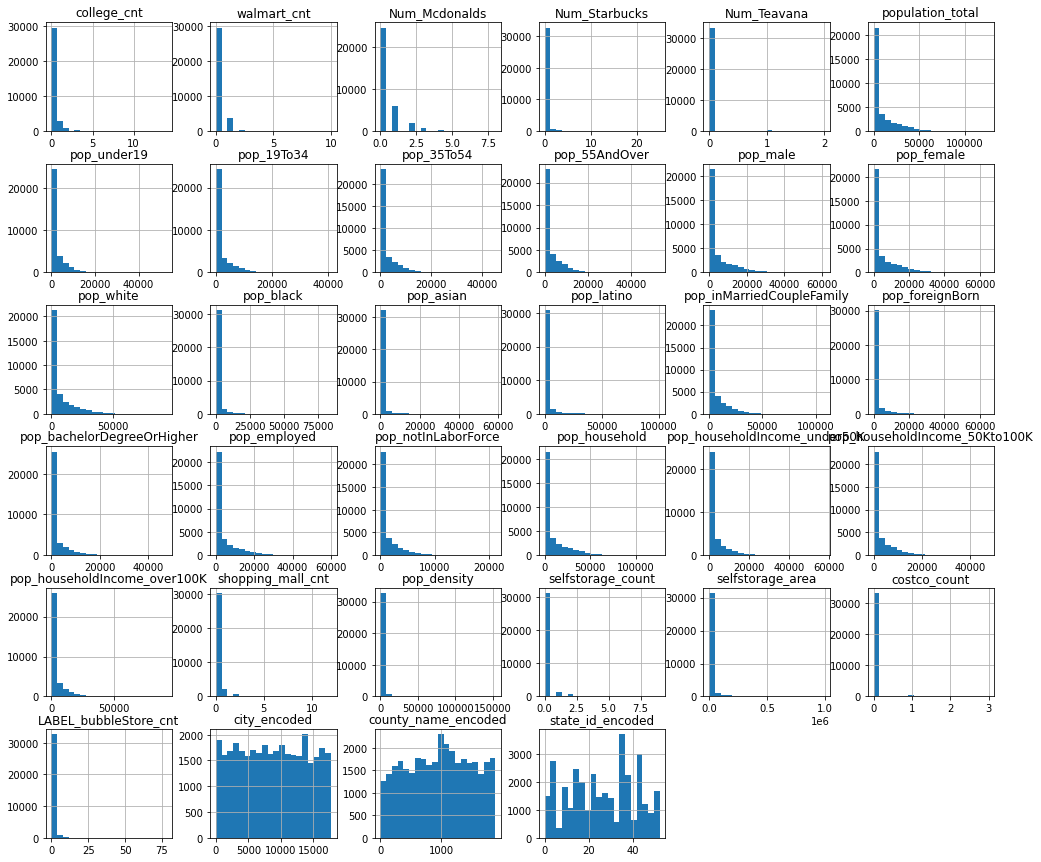

In [145]:
hist = data15.hist(bins=20,
       figsize=[17, 15])

In [223]:
import copy
data16 = copy.deepcopy(data15)

In [224]:
skew_feats = data16.skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
pop_density,12.967685
LABEL_bubbleStore_cnt,12.506732
Num_Teavana,10.938579
pop_asian,9.509264
Num_Starbucks,7.974314
costco_count,7.822025
pop_black,6.787696
selfstorage_area,6.646187
pop_latino,6.303988
selfstorage_count,5.811598


In [225]:
data16.columns[:-4]

Index(['college_cnt', 'walmart_cnt', 'Num_Mcdonalds', 'Num_Starbucks',
       'Num_Teavana', 'population_total', 'pop_under19', 'pop_19To34',
       'pop_35To54', 'pop_55AndOver', 'pop_male', 'pop_female', 'pop_white',
       'pop_black', 'pop_asian', 'pop_latino', 'pop_inMarriedCoupleFamily',
       'pop_foreignBorn', 'pop_bachelorDegreeOrHigher', 'pop_employed',
       'pop_notInLaborForce', 'pop_household', 'pop_householdIncome_under50K',
       'pop_householdIncome_50Kto100K', 'pop_householdIncome_over100K',
       'pop_belowPovertyThreshold', 'income_median', 'shopping_mall_cnt',
       'pop_density', 'selfstorage_count', 'selfstorage_area', 'costco_count'],
      dtype='object')

In [226]:
from scipy.stats import boxcox

cols_boxcox_not_suitable = ['college_cnt', 'walmart_cnt', 'Num_Teavana', 
                            'costco_count', 'selfstorage_area', 'selfstorage_count', 
                           'shopping_mall_cnt', 'Num_Starbucks', 'Num_Mcdonalds']

skewed_cols = list(set(list(data16.columns[:-4])) - set(cols_boxcox_not_suitable))
data16['pop_belowPovertyThreshold'] = pd.to_numeric(data16['pop_belowPovertyThreshold'])
data16['income_median'] = pd.to_numeric(data16['income_median'])
for i in skewed_cols:
    print(i)
    data16[i], lmbda = boxcox(data16[i]+0.0000001, lmbda = None)

pop_inMarriedCoupleFamily
pop_density
income_median
pop_latino
pop_white
population_total
pop_household
pop_employed
pop_55AndOver
pop_bachelorDegreeOrHigher
pop_householdIncome_over100K
pop_male
pop_notInLaborForce
pop_householdIncome_50Kto100K
pop_female
pop_19To34
pop_foreignBorn
pop_black
pop_belowPovertyThreshold
pop_asian
pop_35To54
pop_householdIncome_under50K
pop_under19


In [227]:
skew_feats = data16.skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
LABEL_bubbleStore_cnt,12.506732
Num_Teavana,10.938579
Num_Starbucks,7.974314
costco_count,7.822025
selfstorage_area,6.646187
selfstorage_count,5.811598
shopping_mall_cnt,4.984964
college_cnt,4.983183
walmart_cnt,3.506317
Num_Mcdonalds,2.503030


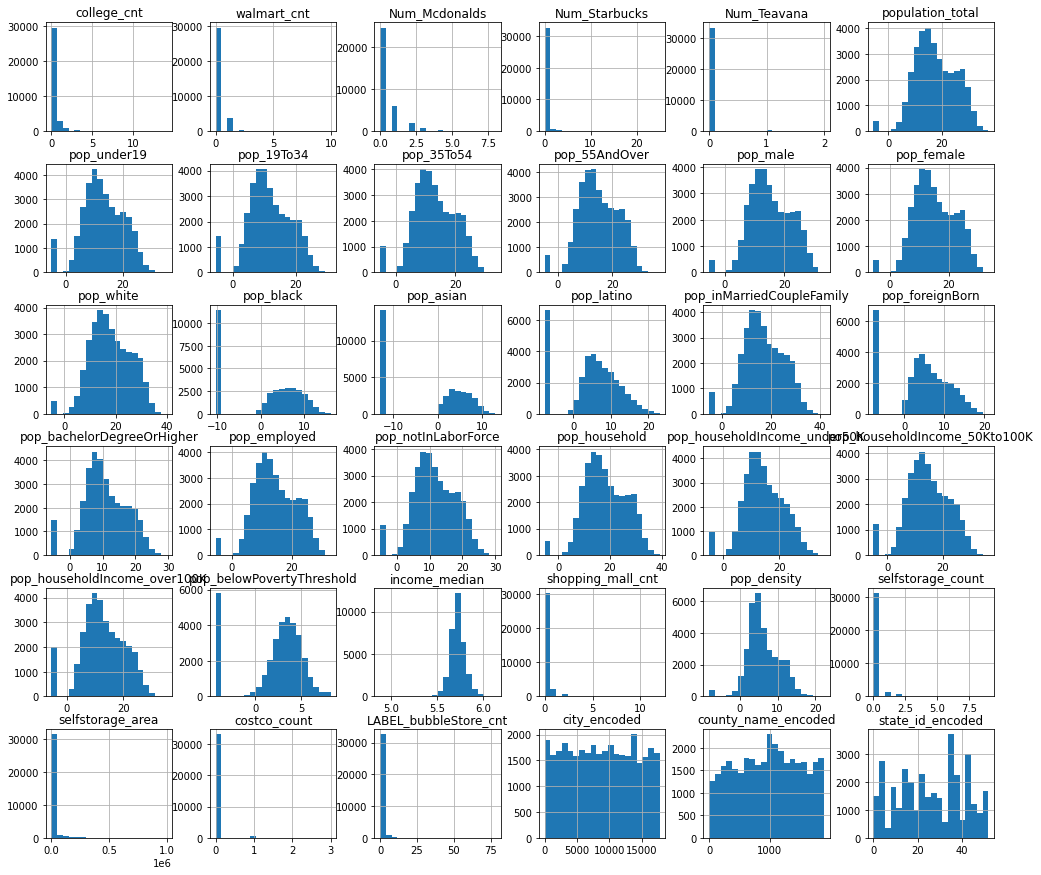

In [238]:
# boxcox transform
hist = data16.hist(bins=20,
       figsize=[17, 15])

In [228]:
data16.to_csv('../data_for_model/full_data_RemoveNAN_transformSkew.csv', index=False)

## Normalization

In [233]:
data17 = copy.deepcopy(data16)

In [234]:
from sklearn import preprocessing
data18_ = preprocessing.normalize(data17, axis=0)
data18 = pd.DataFrame(data18_, columns=data17.columns).set_index([data17.index])
data18['LABEL_bubbleStore_cnt'] = data17['LABEL_bubbleStore_cnt']
data18.head()

,college_cnt,walmart_cnt,Num_Mcdonalds,Num_Starbucks,Num_Teavana,population_total,pop_under19,pop_19To34,pop_35To54,pop_55AndOver,...,income_median,shopping_mall_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,LABEL_bubbleStore_cnt,city_encoded,county_name_encoded,state_id_encoded
zip,,,,,,,,,,,,,,,,,,,,,
00601,0.000000,0.0,0.0,0.0,0.0,0.007048,0.007039,0.007202,0.007198,0.007332,...,0.005142,0.0,0.005348,0.0,0.0,0.0,0.0,0.000036,0.000034,0.007089
00602,0.000000,0.0,0.0,0.0,0.0,0.008307,0.008226,0.008652,0.008718,0.008918,...,0.005215,0.0,0.007405,0.0,0.0,0.0,0.0,0.000046,0.000039,0.007089
00603,0.017335,0.0,0.0,0.0,0.0,0.008629,0.008783,0.008886,0.008982,0.009355,...,0.005226,0.0,0.007629,0.0,0.0,0.0,0.0,0.000047,0.000044,0.007089
00606,0.000000,0.0,0.0,0.0,0.0,0.005704,0.005341,0.005614,0.005742,0.005870,...,0.005132,0.0,0.004662,0.0,0.0,0.0,0.0,0.005091,0.005202,0.007089
00610,0.000000,0.0,0.0,0.0,0.0,0.007751,0.007635,0.008002,0.008132,0.008192,...,0.005230,0.0,0.006706,0.0,0.0,0.0,0.0,0.000184,0.000448,0.007089


In [235]:
data18.to_csv('../data_for_model/full_data_RemoveNAN_transformSkew_norm_labelNotNorm.csv', index=True)

In [231]:
data18.to_csv('../data_for_model/full_data_RemoveNAN_transformSkew_norm.csv', index=True)

In [232]:
data18

,college_cnt,walmart_cnt,Num_Mcdonalds,Num_Starbucks,Num_Teavana,population_total,pop_under19,pop_19To34,pop_35To54,pop_55AndOver,...,income_median,shopping_mall_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,LABEL_bubbleStore_cnt,city_encoded,county_name_encoded,state_id_encoded
zip,,,,,,,,,,,,,,,,,,,,,
00601,0.000000,0.0,0.0,0.0,0.0,0.007048,0.007039,0.007202,0.007198,0.007332,...,0.005142,0.0,0.005348,0.0,0.0,0.0,0.0,0.000036,0.000034,0.007089
00602,0.000000,0.0,0.0,0.0,0.0,0.008307,0.008226,0.008652,0.008718,0.008918,...,0.005215,0.0,0.007405,0.0,0.0,0.0,0.0,0.000046,0.000039,0.007089
00603,0.017335,0.0,0.0,0.0,0.0,0.008629,0.008783,0.008886,0.008982,0.009355,...,0.005226,0.0,0.007629,0.0,0.0,0.0,0.0,0.000047,0.000044,0.007089
00606,0.000000,0.0,0.0,0.0,0.0,0.005704,0.005341,0.005614,0.005742,0.005870,...,0.005132,0.0,0.004662,0.0,0.0,0.0,0.0,0.005091,0.005202,0.007089
00610,0.000000,0.0,0.0,0.0,0.0,0.007751,0.007635,0.008002,0.008132,0.008192,...,0.005230,0.0,0.006706,0.0,0.0,0.0,0.0,0.000184,0.000448,0.007089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,0.000000,0.0,0.0,0.0,0.0,0.000880,-0.001867,-0.002137,-0.001895,0.001047,...,0.005431,0.0,-0.000105,0.0,0.0,0.0,0.0,0.003964,0.006845,0.000000
99925,0.000000,0.0,0.0,0.0,0.0,0.003727,0.003402,0.003353,0.003656,0.003426,...,0.005453,0.0,0.002411,0.0,0.0,0.0,0.0,0.004375,0.006845,0.000000
99926,0.000000,0.0,0.0,0.0,0.0,0.004174,0.004190,0.003982,0.003972,0.003732,...,0.005431,0.0,0.002036,0.0,0.0,0.0,0.0,0.005363,0.006845,0.000000


In [237]:
data18[data18['LABEL_bubbleStore_cnt']>1]

,college_cnt,walmart_cnt,Num_Mcdonalds,Num_Starbucks,Num_Teavana,population_total,pop_under19,pop_19To34,pop_35To54,pop_55AndOver,...,income_median,shopping_mall_cnt,pop_density,selfstorage_count,selfstorage_area,costco_count,LABEL_bubbleStore_cnt,city_encoded,county_name_encoded,state_id_encoded
zip,,,,,,,,,,,,,,,,,,,,,
00925,0.000000,0.000000,0.000000,0.000000,0.000000,0.005725,0.004685,0.006466,0.005607,0.005726,...,0.005176,0.000000,0.011397,0.0,0.0,0.000000,2.0,0.007503,0.007372,0.007089
01002,0.017335,0.000000,0.000000,0.000000,0.000000,0.007955,0.007717,0.009849,0.007403,0.007566,...,0.005508,0.000000,0.006300,0.0,0.0,0.000000,4.0,0.000168,0.003607,0.003454
01027,0.000000,0.000000,0.006084,0.000000,0.000000,0.007127,0.006638,0.007263,0.007300,0.007709,...,0.005453,0.000000,0.006004,0.0,0.0,0.000000,2.0,0.002432,0.003607,0.003454
01040,0.008668,0.000000,0.024334,0.009430,0.057928,0.008403,0.008838,0.009209,0.008709,0.008417,...,0.005404,0.009379,0.008021,0.0,0.0,0.000000,2.0,0.003829,0.003602,0.003454
01060,0.000000,0.013133,0.006084,0.009430,0.000000,0.006991,0.006659,0.007979,0.007119,0.006767,...,0.005499,0.000000,0.007691,0.0,0.0,0.000000,3.0,0.006082,0.003607,0.003454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99301,0.008668,0.013133,0.012167,0.000000,0.000000,0.009724,0.011238,0.010626,0.010108,0.009211,...,0.005474,0.000000,0.004862,0.0,0.0,0.000000,2.0,0.006464,0.003031,0.008907
99336,0.017335,0.000000,0.024334,0.018860,0.000000,0.008872,0.009807,0.009589,0.008948,0.008976,...,0.005421,0.000000,0.009161,0.0,0.0,0.041451,4.0,0.004269,0.000723,0.008907
99352,0.008668,0.013133,0.018251,0.018860,0.000000,0.008070,0.008520,0.008419,0.008358,0.008276,...,0.005522,0.000000,0.007750,0.0,0.0,0.000000,4.0,0.007138,0.000723,0.008907
